In [68]:
import re
import math
import pandas as pd
import numpy as np
import pandas as pd
import statistics as stats
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from random import randint
from scipy.stats import kstest
from matplotlib import pyplot as plt
from scipy.stats import t
import seaborn as sns
import math
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm 
import itertools
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [69]:
df = pd.read_csv('telco.csv', sep='	')

1. The lasso regression is an alternative approach to variable selection.

(a) Explain in your own words the idea of the lasso regression. Sketch a situation
when a simple linear regression fails, but the lasso regression still can be estimated.

**** Lasso performs a so called L1 regularization (a process of introducing additional information in order to prevent overfitting), i.e. adds penalty equivalent to absolute value of the magnitude of coefficients. In particular, the minimization objective does not only include the residual sum of squares (RSS) - like in the OLS regression setting - but also the sum of the absolute value of coefficients.
Lasso will help in case we have low quantity of observations but a lot of features

(b) For the usual regression model the variables are rarely normalized/standardized.
However, in the case of the lasso regression the scaling becomes crucial. Why?
Scale your data by (x i − x̄)/σ̂ x . Can/should the binary variCan/should the binary variables be scaled in the
same fashion? How would you handle the variable ed?

Normalization is very important for methods with regularization. This is because the scale of the variables affect the how much regularization will be applies to specific variable. For example, suppose one variable is in a very large scale, say order of millions and another variable is from 0 to 1. Then, we can think the regularization will have little effect on first variable. As well as we do normalization, normalize it to 0 to 1 or standardize the features does not matter too much. 

The lasso method requires initial standardization of the regressors, so that the penalization scheme is fair to all regressors. For categorical regressors, one codes the regressor with dummy variables and then standardizes the dummy variables.

(c) Run a lasso regression for data with α ∈ (0, 1). Plot the estimated parameters
as functions of α. Which value of α would you recommend? If it is easy to
implement, then determine the optimal λ by cross-validation.

In [70]:
df.columns

Index(['tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ',
       'retire', 'gender', 'longmon', 'wiremon', 'churn'],
      dtype='object')

In [71]:
df.head(2)

,tenure,age,marital,address,income,ed,employ,retire,gender,longmon,wiremon,churn
1,13,44,Married,9,64,College degree,5,No,Male,3.7,0.0,Yes
2,11,33,Married,7,136,Post-undergraduate degree,5,No,Male,4.4,35.7,Yes


In [72]:
df = pd.get_dummies(df, columns=['marital','ed', 'churn', 'retire', 'gender']).head()
df.fillna(0, inplace=True)

In [73]:
df = (df - df.mean())/df.std()
df.fillna(0, inplace = True)

In [74]:
X = df.drop(columns=['longmon', 'marital_Unmarried', 'ed_College degree','churn_No','retire_No','gender_Female'])
y = df['longmon'] 
X.head(2)


,tenure,age,address,income,employ,wiremon,marital_Married,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college,churn_Yes,retire_Yes,gender_Male
1,-0.715810,0.602813,-0.468265,-0.244605,-0.27074,-0.447214,0.447214,-0.730297,-0.447214,-0.447214,0.0,0.730297,0.0,0.730297
2,-0.802052,-0.581284,-0.760930,1.247900,-0.27074,1.788854,0.447214,-0.730297,-0.447214,1.788854,0.0,0.730297,0.0,0.730297


In [75]:
reg = Lasso(alpha=0.5)
reg.fit(X, y)


Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9


/home/ky/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/home/ky/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


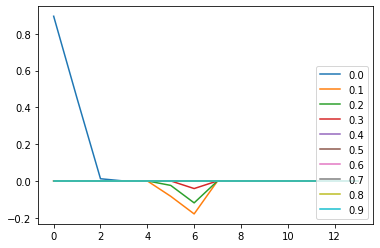

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
plt.clf()
result = pd.DataFrame()

for i in np.arange(0.0, 1.0, 0.1):
    print(i)
    reg = Lasso(alpha=i)
    reg.fit(X_train, y_train)
    plt.plot(reg.coef_, label=round(i, 1))
    
plt.legend(loc="lower right")
    
plt.show()

As we see the most coefficients different from zero is at Alpha abt. 0.6. It seems the most optimal

/home/ky/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


CV [ 0.9137916   0.          0.          0.01205257  0.          0.
 -0.          0.          0.          0.          0.         -0.
  0.         -0.02873007]


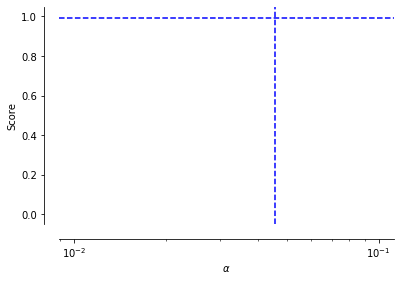

In [77]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
plt.clf()
alphas = np.logspace(0, 1, 0.1)
scores = np.empty_like(alphas)
for i,a in enumerate(alphas):
    lasso = linear_model.Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    scores[i] = lasso.score(X_test, y_test)
    print(a, lasso.coef_)
    
lassocv = linear_model.LassoCV()
lassocv.fit(X, y)
lassocv_score = lassocv.score(X, y)
lassocv_alpha = lassocv.alpha_
print('CV', lassocv.coef_)

plt.plot(alphas, scores, '-ko')
plt.axhline(lassocv_score, color='b', ls='--')
plt.axvline(lassocv_alpha, color='b', ls='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')
plt.xscale('log')
sns.despine(offset=15)

In [78]:
lassocv_alpha

0.04561843263884558

2. A nonlinear regression offers a flexible technique for modelling complex relationships.
We wish to explain the tenure by the long distance calls per month longmon.
(a) Make a bivariate scatter plot and estimate an appropriate linear (!) model. Add
the regression line to the plot.

In [79]:
df = pd.read_csv('telco.csv', sep='	')

<Figure size 432x288 with 0 Axes>

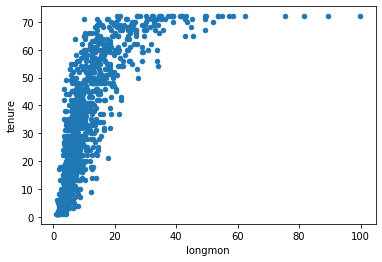

In [80]:
plt.clf()
df.plot(x='longmon', y='tenure', kind='scatter')
plt.show()

Grahp see more like logarithm function, so appropriate linear model will be y = b0 + b1 * ln(xi) + ui

In [81]:
# df['longmon_exp'] = df['longmon'].apply(lambda x: 0 if x ==0 else math.exp(x))
# df['longmon_sq'] = df['longmon'].apply(lambda x: 0 if x ==0 else (x**(2)))

/home/ky/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


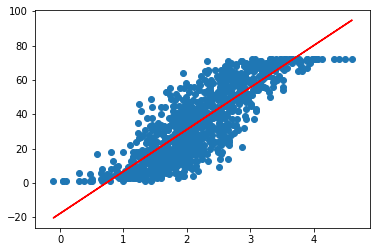

In [82]:
df['longmon_ln'] = df['longmon'].apply(lambda x: 0 if x ==0 else math.log(x))
X = df['longmon_ln'].astype(float)
Y = df['tenure']
model = sm.OLS(Y, sm.add_constant(X))
results = model.fit()
# results.params
intercept, slope  = results.params
line = slope*X+intercept
plt.clf()
plt.plot(X, line, 'r', )
plt.scatter(X, Y)
plt.show()

[1.]


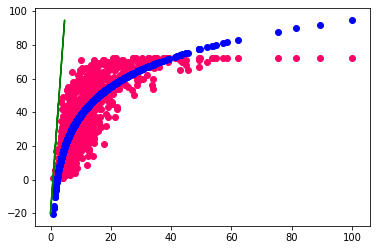

In [83]:
import numpy as np
import scipy.optimize as optimize
import matplotlib.pylab as plt

def func(power,b0,b1):
    return (b0  + b1 * np.log(x**power))

def residuals(power,b0,b1,PLP):
    return y - func(power,b0,b1)

N=1000
x= df['longmon']
y = df['tenure']
# x = pd.to_numeric(df['longmon'], errors='raise', downcast='float')
# y = pd.to_numeric(df['tenure'], errors='raise', downcast='float')
power_guess=0.1  
b0 = intercept
b1 = slope


power,cov,infodict,mesg,ier = optimize.leastsq(
    residuals,power_guess,args=(b0,b1,y),full_output=True)

y_fit=func(power,b0,b1)

print(power)

plt.scatter(x, y, color="#FF0067")
plt.scatter(x, y_fit, color="#0000FF")
plt.plot(X, line, 'g', )
plt.show()

(c) Explain in your own words, why all the classical tests and inferences are not
directly applicable to the NLS estimators.


 - If we have small number of observations per parameter, but large number of parameters, we will have large variances and as results unreliable tests and huge inferences.

(d) What kind of problems might arise if we decide to fit a non-linear regression using
all explanatory variables?

 - Because of high variances ann linearity increase of variance, the non linear model can become bias.

3. Next we model the relationship between tenure and address using the nonparametric
Nadaraya-Watson regression.


(a) An important calibration parameter of a nonparametric regression is the band-
width. Explain what happens with the regression/the weights in the Nadaraya-
Watson regression if the bandwidth is too high or too small.

 - If the bandwith is to small the density function won't be smooth, if too huge - it would be too smooth and won't represent the actual shape.

(b) Fit a Nadaraya-Watson regression with Gaussian kernel and “optimal” bandwidth
to the longmon/address data. Check and explain how the “optimal bandwidth”
is determined in your software. Compare the (in-sample) fit of the nonparametric
regression and the nonlinear regression in the previous subproblem.


In [84]:
x = df['address']
y = df['tenure']

R2 0.27770519056147275


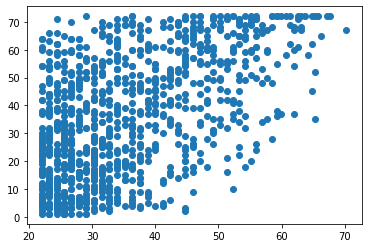

In [85]:
from statsmodels.nonparametric.kernel_regression import KernelReg
model = KernelReg(endog=y, exog= x, var_type='c')
results = model.fit()
plt.scatter(pd.Series(results[0]),y)
print("R2",model.r_squared())

By default method for bandwidth selection is ‘cv_ls’ (least-squares cross-validation)

In [86]:
# Nadaraya-Watson prediction
model.fit(x[21:22])

(array([42.41138129]), array([[1.20675894]]))

In [87]:
# Non-linear model predicion
func(b0,b1, x[21:22])

1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
        ..
996    NaN
997    NaN
998    NaN
999    NaN
1000   NaN
Name: address, Length: 1000, dtype: float64

From the graph above we see that Nadaraya Watson gave result much more seems to be true

4. Next we consider classification of the clients using the churn variable as the dependent
variable and the logistic regression.

(a) Fit a logistic regression to explain churn by the remaining explanatory variables.

In [88]:
# Prepare data for logistic regression

data = pd.read_csv('telco.csv', sep='	')
ed = data['ed'].unique()
cat_vars = ['churn', 'marital', 'ed', 'retire', 'gender']
for var in cat_vars:
    cat_list='var'+'_'+var
#     print(data[var])
    cat_list = pd.get_dummies(data[[var]], prefix=var)
    data1=data.join(cat_list)
    data=data1

cat_vars=['churn','marital', 'ed', 'retire', 'gender']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data = data[map(lambda x :x not in ['churn','marital', 'ed', 'retire', 'gender', 'marital_Unmarried', 'retire_No', 'gender_Female', 'churn_No'], list(data.columns))]
data.head(2)

,tenure,age,address,income,employ,longmon,wiremon,churn_Yes,marital_Married,ed_College degree,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college,retire_Yes,gender_Male
1,13,44,9,64,5,3.7,0.0,1,1,1,0,0,0,0,0,1
2,11,33,7,136,5,4.4,35.7,1,1,0,0,0,1,0,0,1


In [89]:
str(data.columns.tolist())
ed = ['ed_College degree', 'ed_Did not complete high school', 'ed_High school degree', 'ed_Post-undergraduate degree', 'ed_Some college']

In [90]:
X = data.loc[:, data.columns != 'churn_Yes']
y = data.loc[:, data.columns == 'churn_Yes']

In [91]:
# Feature selection 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X, y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/home/ky/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [92]:
# Logistic regression
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                                Results: Logit
Model:                    Logit                  Pseudo R-squared:       inf   
Dependent Variable:       churn_Yes              AIC:                    inf   
Date:                     2020-01-31 22:30       BIC:                    inf   
No. Observations:         1000                   Log-Likelihood:         -inf  
Df Model:                 14                     LL-Null:                0.0000
Df Residuals:             985                    LLR p-value:            1.0000
Converged:                1.0000                 Scale:                  1.0000
No. Iterations:           7.0000                                               
-------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------

/home/ky/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/ky/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/home/ky/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/ky/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(b) Consider the explanatory variable tenure. Obviously its parameter cannot be
interpreted in the same way as for a linear regression. Provide the correct inter-
pretation using the parameter and using odds.

 - With the increase of client's usage period by 1 month, the probability of contact termination decrease by 3.17%.

(c) Run a stepwise model selection using AIC as criterion. Further consider only
the optimal model chosen here. From the final model, which of the variables do
increase the probability of churn and which variables decrease this probability?
Is this consistent with economic intuition?

In [93]:
# Unfortunatelly the is no stepwise model selection in python. So lets inmplement it's analogue algorithm.

# 1 Create all possible combinations of features. Dummies of categorical "Ed"  should be included all in the regresion 
feature_list = X.columns.tolist()
feature_list = [i for i in feature_list if i not in ed]
feature_list.append(ed)

feature_list1 = []
for i in range(len(feature_list)):
    feature_list1.append(list(map(list, itertools.combinations(feature_list, i))))
    
feature_list = feature_list1[3:]

def Flatten(xs):
    res = []
    def loop(ys):
        for i in ys:
            if isinstance(i, list):
                loop(i)
            else:
                res.append(i)
    loop(xs)
    return res

# 2 Run the logistic regression & select the combination that gives the smallest AIC

stat = pd.DataFrame()

for a in feature_list:
    for l in a:
        flatten = Flatten(l)
#         print(flatten)
        
        x = data[Flatten(l)]
        logit_model=sm.Logit(y,x)
        result=logit_model.fit()
        aic0 = result.aic
        feature = Flatten(l)
        print(result.aic)
#         aic1 = aic.append({'feature': i, 'aic': result.aic}, ignore_index=True)

        stat = stat.append({'feature': feature, 'aic': result.aic}, ignore_index=True)

stat.sort_values(by=['aic']).head(10)
stat.loc[stat['aic'] == stat['aic'].min()]

/home/ky/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/ky/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: 261.835354
         Iterations 6
523676.70703753975
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: 262.167367
         Iterations 6
524340.7331220951
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         C

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: 262.171301
         Iterations 6
524350.6019535933
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value:

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: 218.289856
         Iterations 5
436587.7112003238
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value:

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Ite

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

,aic,feature
156,262849.56637,"[wiremon, marital_Married, gender_Male]"


In [94]:
# Lets choose  threshold 

threshold=0.5

predicted_values = result.predict()
predicted_class=np.zeros(predicted_values.shape)
predicted_class[predicted_values>threshold]=1

# Classification table, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y,predicted_class)
print('Classification table : \n', cm)

total=sum(sum(cm))
# from classification table calculate accuracy
accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Classification table : 
 [[672  54]
 [183  91]]
Accuracy :  0.763
Sensitivity :  0.9256198347107438
Specificity :  0.33211678832116787


(f) To improve the performance it makes sense to change the threshold used for clas-
sification. This can be done using the ROC curve. Plot this curve and determine
the optimal threshold.

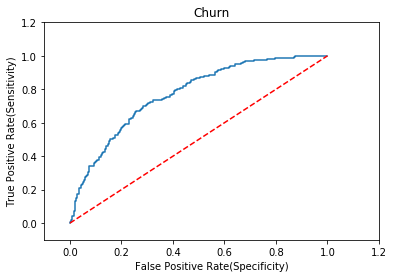

In [95]:
###for visualising the plots use matplotlib and import roc_curve,auc from sklearn.metrics 
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

actual = y
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predicted_values)
plt.title('Churn')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

In [96]:
threshold = auc(false_positive_rate, true_positive_rate)
threshold

0.7706561299792886

(g) Recompute the classification table, sensitivity and specificity for the new thresh-
old. Provide interpretation of the obtained values. Compare the results with the
original values. Is the procedure now more strict/conservative?

In [97]:
predicted_values = result.predict()
predicted_class=np.zeros(predicted_values.shape)
predicted_class[predicted_values>threshold]=1

# Classification table, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y,predicted_class)
print('Classification table : \n', cm)

total=sum(sum(cm))
# from classification table calculate accuracy
accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Classification table : 
 [[726   0]
 [274   0]]
Accuracy :  0.726
Sensitivity :  1.0
Specificity :  0.0


5. In the next step we model tenure using regression trees.


    (a) Assume the first variable to be used for splitting is longmon. Write down the corresponding optimization problem and explain how the optimization works.
    
    The basic idea behind any decision tree algorithm is to choose parameter to split our data into smaller subsets. Perform tree building by repeating this process recursively for each child until one of the condition will match:
        All the tuples belong to the same attribute value.
        There are no more remaining attributes.
        There are no more instances. 
    
    Like in Lasso we introduce penaltization factor for quantity of nodes. So optimization problem will be like that: 
     minimize  ( (y - yR) + alpha * |T|


In [98]:
# Prepare data

data = pd.read_csv('telco.csv', sep='	')
ed = data['ed'].unique()
cat_vars = ['churn', 'marital', 'ed', 'retire', 'gender']
for var in cat_vars:
    cat_list='var'+'_'+var
#     print(data[var])
    cat_list = pd.get_dummies(data[[var]], prefix=var)
    data1=data.join(cat_list)
    data=data1

cat_vars=['churn','marital', 'ed', 'retire', 'gender']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data = data[map(lambda x :x not in ['churn','marital', 'ed', 'retire', 'gender', 'marital_Unmarried', 'retire_No', 'gender_Female', 'churn_No'], list(data.columns))]
data.head(2)

# x = data.loc[:, data.columns != 'tenure']
# y = data.loc[:, data.columns == 'tenure']

,tenure,age,address,income,employ,longmon,wiremon,churn_Yes,marital_Married,ed_College degree,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college,retire_Yes,gender_Male
1,13,44,9,64,5,3.7,0.0,1,1,1,0,0,0,0,0,1
2,11,33,7,136,5,4.4,35.7,1,1,0,0,0,1,0,0,1


In [99]:
# Built Decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO

x = data.loc[:, data.columns != 'longmon']
y = data.loc[:, data.columns == 'tenure']

dtree = DecisionTreeClassifier(max_depth=10)
dtree.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

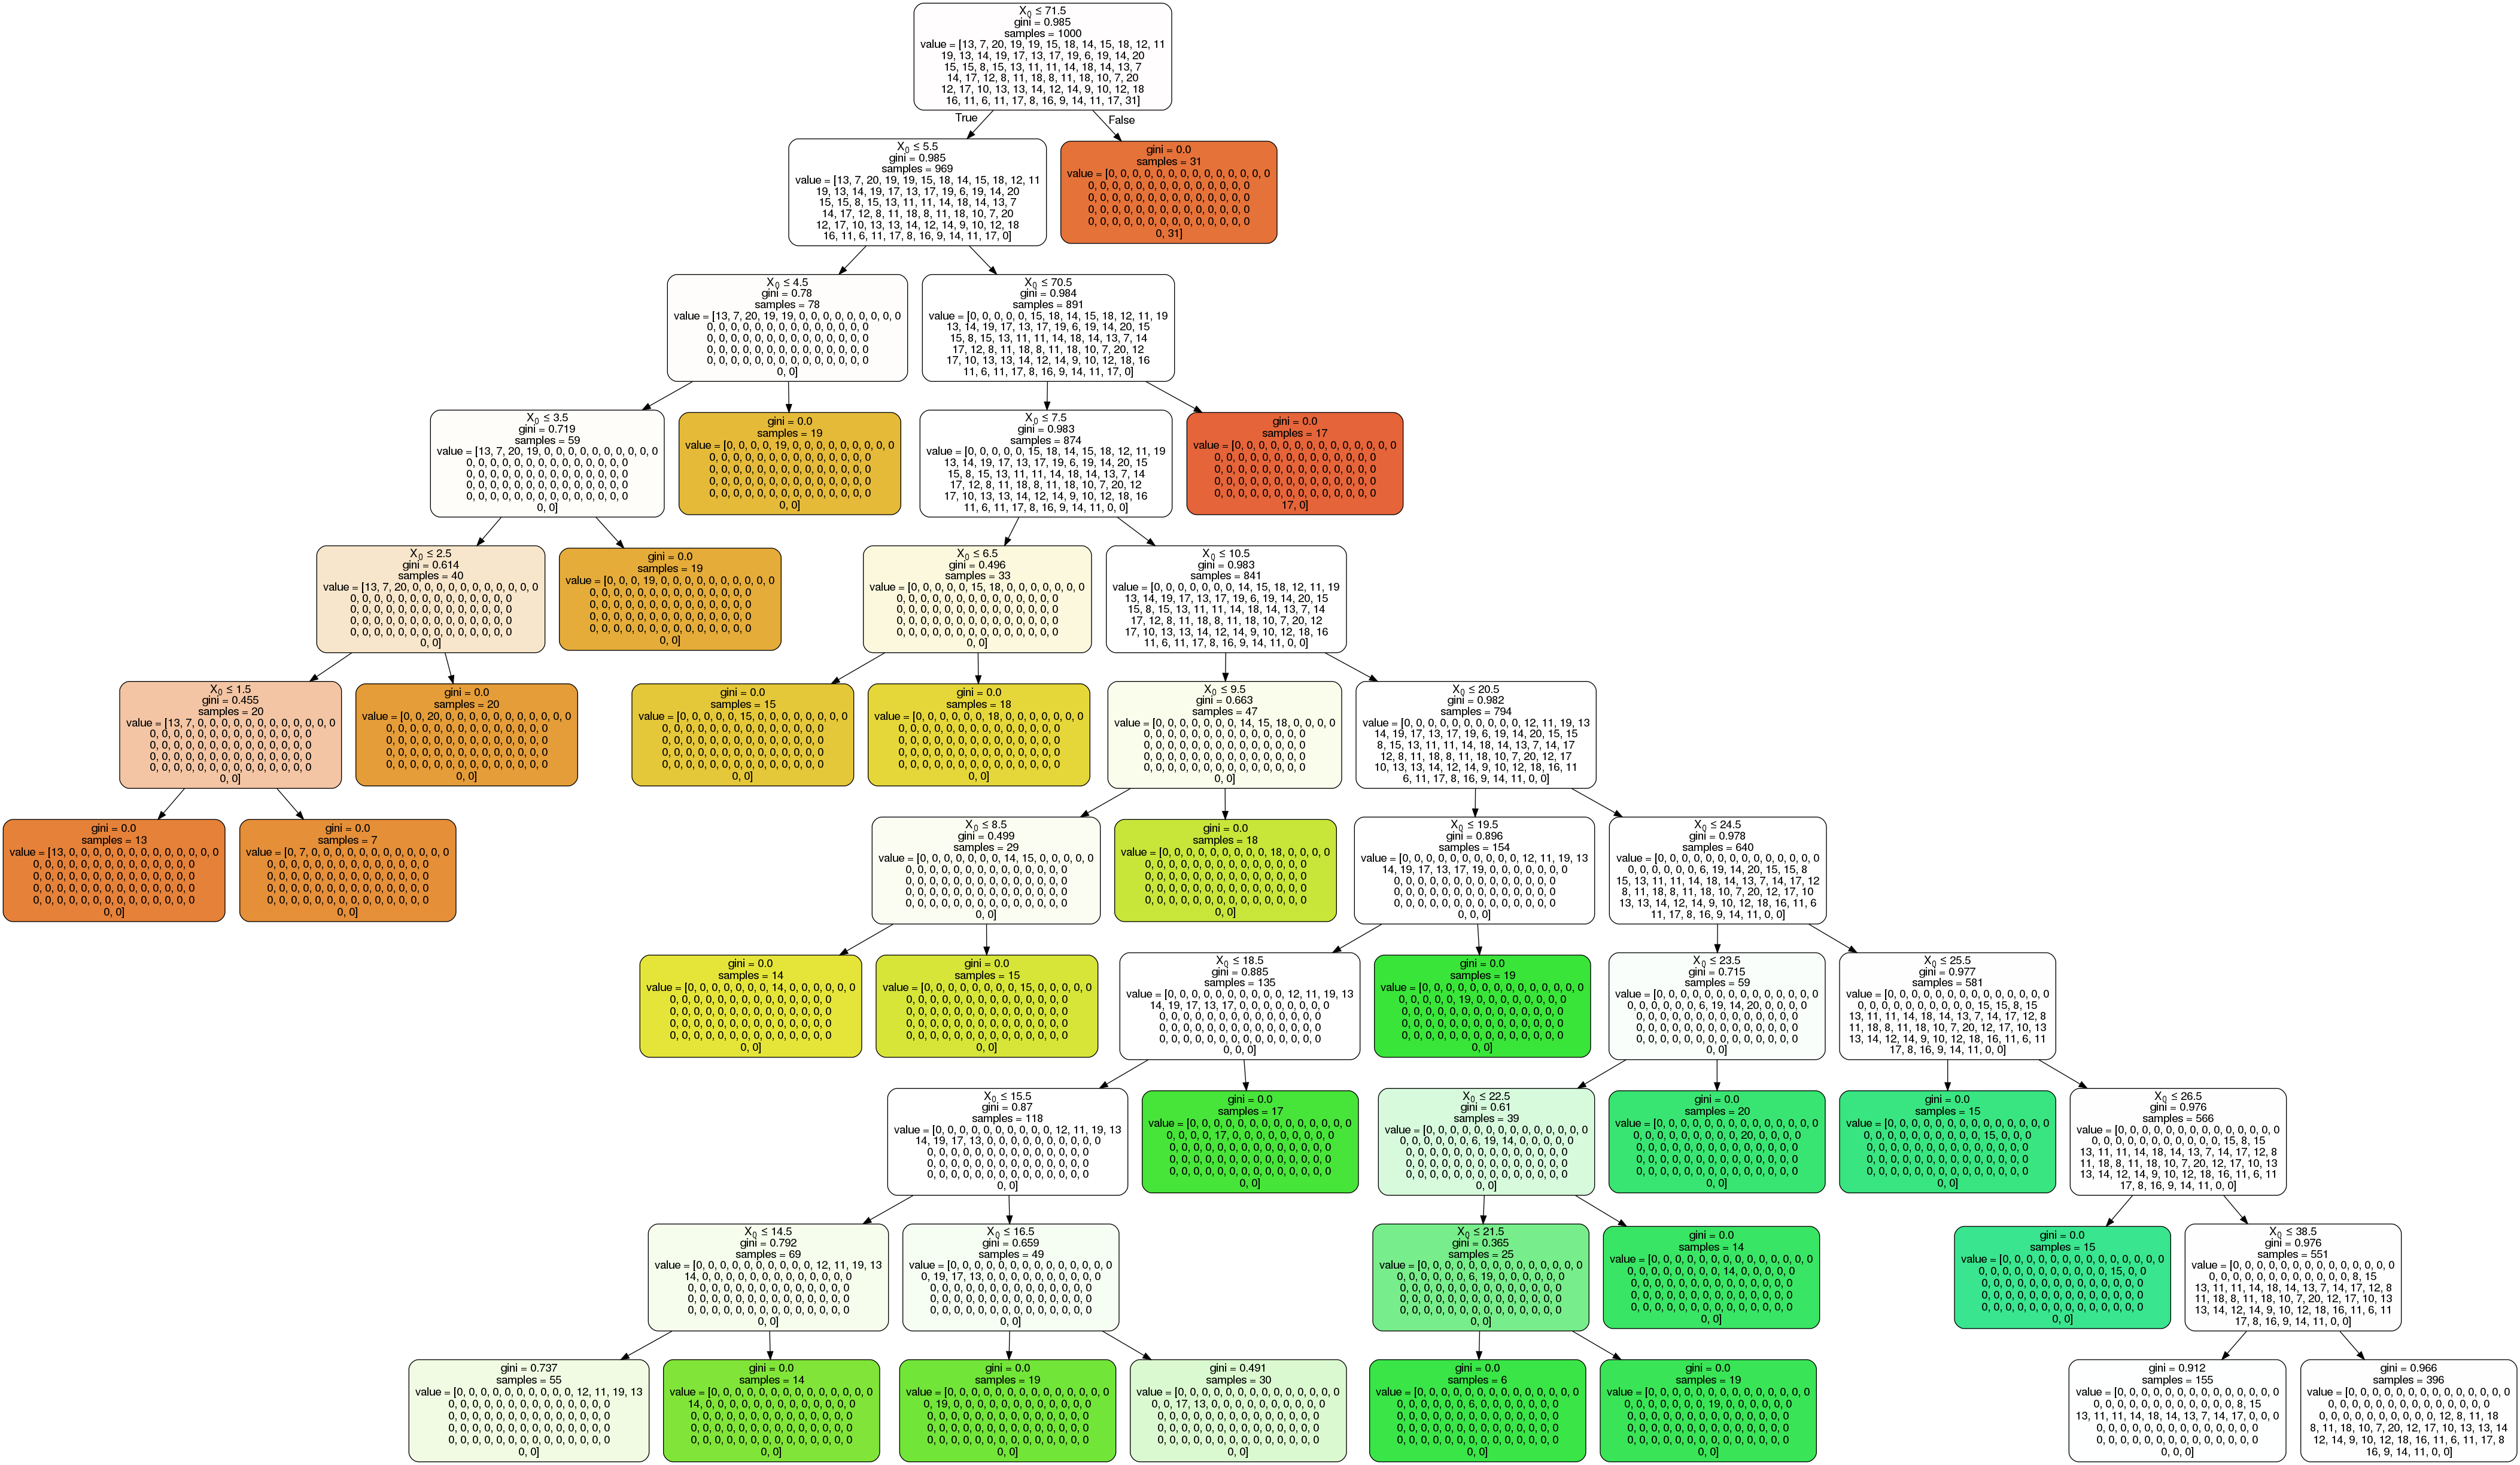

In [100]:
# Vizualize it
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image, display
import pydotplus

def jupyter_graphviz(m, **kwargs):
    dot_data = StringIO()
    export_graphviz(m, dot_data, **kwargs)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))
    
jupyter_graphviz(dtree, filled=True, rounded=True, special_characters=True)

(b) Obviously you can get very long trees. Tree prunning helps to get trees of a
reasonable size. Fit a CART to the data and prune it to have at most 10 splits.
What is the value of the corresponding complexity parameter? Check you software
for the implementation of the prunning, particularly the form of the loss function.

Corresponding complexity parameter helps to evaluate the quality of a potential split when growing your tree, or more specifically, it is the amount by which splitting that node would decrease the relative error. The function to measure the quality of a split.

In sklearn by default it is “gini”.